# CNN for task performance comparison

#### Unzip files

In [0]:
# unzip files
import zipfile

UNZIP_NAME = 'mnist.zip'

zip_ref = zipfile.ZipFile(UNZIP_NAME, 'r')
zip_ref.extractall('./')
zip_ref.close()

## Get data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#### Import data

In [5]:
#DATA_PATH = '/Users/anthony/Documents/Comp551_Projects/CapNET/data/mnistData.npz'
DATA_PATH = 'mnistData.npz'

npzfile = np.load(DATA_PATH)
npzfile.files

['X_train', 'y_train', 'X_test', 'y_test']

#### Unpack - take subset? 

In [6]:
TAKE_SUBSET = True
SUBSET_SIZE = 3000

# Unpack the training and testing datasets
X_train, y_train = npzfile['X_train'], npzfile['y_train']
X_test, y_test = npzfile['X_test'], npzfile['y_test']

# Take subset
if TAKE_SUBSET:
    X_train = X_train[0:SUBSET_SIZE]
    y_train = y_train[0:SUBSET_SIZE]
    
# Expand the dimension of images to signal greyscale
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(3000, 28, 28, 1)
(3000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Set up convolutional net

In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Input

Using TensorFlow backend.


### Define model(s)

In [0]:
def basic_CNN():
    # Input layer
    x = Input(shape=(28,28,1))
    
    # First convolution
    conv1 = Conv2D(filters=256, kernel_size=9, strides=1,\
                          padding='valid', activation='relu')(x)
    
    # Second convolution (32 capsules * 8 dimensions: 256 individual filters equivalency )
    conv2 = Conv2D(filters=256, kernel_size=9, strides=2,\
                          padding='valid', activation='relu')(conv1)
    
    # Flatten
    flat = Flatten()(conv2)
    
    # Dense layer (10 capsules * 16 dimensions: 160 fully connected equivalency)
    fc1 = Dense(units=160, activation='relu')(flat)
    
    # Output layer
    fc2 = Dense(10, activation='softmax')(fc1)    
    
    # Compile model
    model = Model(x, fc2)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    
    

In [14]:
model = basic_CNN()
model.summary()

## TODO: compare the number of parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 256)       20992     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 256)         5308672   
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 160)               1474720   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1610      
Total params: 6,805,994
Trainable params: 6,805,994
Non-trainable params: 0
_________________________________________________________________


### Train model

In [15]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=30,
                    shuffle=True,
                    validation_data=(X_test, y_test)
                   )

Train on 3000 samples, validate on 10000 samples
Epoch 1/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.5252 - acc: 0.8407 - val_loss: 0.2417 - val_acc: 0.9226
Epoch 2/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1381 - acc: 0.9613 - val_loss: 0.1537 - val_acc: 0.9530
Epoch 3/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0856 - acc: 0.9733 - val_loss: 0.1408 - val_acc: 0.9566
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0596 - acc: 0.9807 - val_loss: 0.1093 - val_acc: 0.9682
Epoch 5/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0390 - acc: 0.9857 - val_loss: 0.1349 - val_acc: 0.9639
Epoch 6/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0318 - acc: 0.9927 - val_loss: 0.1608 - val_acc: 0.9519
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0128 - acc: 0.9970 - val_loss: 0.1422 - val_acc: 0.9631
Epoch 8/10
30

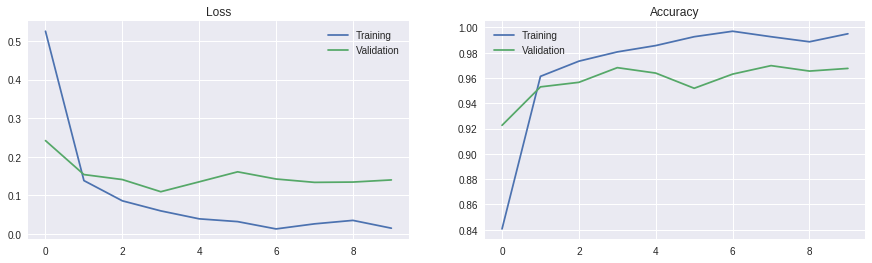

In [20]:
# Plot history
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Training','Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['Training','Validation'])

plt.show()

In [0]:
#TODO: save the models